In [1]:
import numpy as np
import pandas as pd
import zipfile
import datetime
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

### Data Gathering
#### 1. Unzip Bay area zip file of 2018 bike share data and combine them to a DataFrame bay_18. After that, save the DataFrame to a csv file '2018-bay.csv'.

In [2]:
bay_18 = pd.DataFrame()

In [3]:
shape_bay_18 = 0
for i in range(201801,201813):
    zipfilename = "%s-fordgobike-tripdata.csv.zip" % i
    with zipfile.ZipFile(zipfilename,'r') as myzip:
        filename = myzip.namelist()
        myzip.extractall()
    df_temp = pd.read_csv(filename[0])
    shape_bay_18 = shape_bay_18 + df_temp.shape[0]
    bay_18 = bay_18.append(df_temp, ignore_index=True)

In [4]:
shape_bay_18 == bay_18.shape[0]

True

In [5]:
shape_bay_18

1863721

In [6]:
bay_18.to_csv('2018-bay.csv',encoding='utf-8', index=False)

In [7]:
bay_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [8]:
b18 = bay_18.copy()

### Data Assess
#### Bay area 2018

In [9]:
b18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


##### 1. To check null value

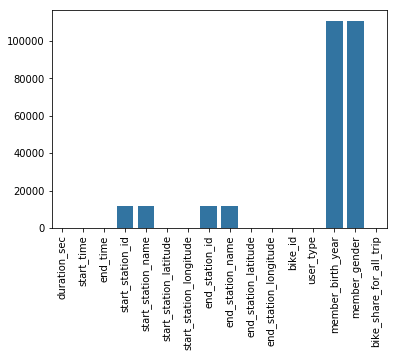

In [10]:
base_color = sb.color_palette()[0]
na_counts = b18.isna().sum()
sb.barplot(na_counts.index.values, na_counts, color = base_color);
plt.xticks(rotation = 90);

##### There are around 100,000 records have not member gender and age information. And there are around 20,000 records have no station information. I will fill 'unknow' to member gender, but not fill anything in member birth year. About station, I will ignore it, because I will not do Geographic in this project, those columns will be droped.

##### 2. column 'duration_sec' need to change unit to 'minutes', it is easy to understande for analysis.

In [11]:
b18.duration_sec.describe()

count    1.863721e+06
mean     8.573026e+02
std      2.370379e+03
min      6.100000e+01
25%      3.500000e+02
50%      5.560000e+02
75%      8.720000e+02
max      8.636600e+04
Name: duration_sec, dtype: float64

##### 3. columns 'start_time'  could be extraced more feature of time, like 'month', 'weekday', 'hour', before that we need change data type to datetime.

In [12]:
b18.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


##### 4. All station columns will be droped after extract one information: is it a round trip or one way trip.

##### 5. columns 'user_type' should be change type to category

In [13]:
b18.user_type.value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

##### 6. columns 'member_birth_year' should be change to another way of expression: age. Age is easy to analysis.

In [14]:
b18.member_birth_year.describe()

count    1.753003e+06
mean     1.983088e+03
std      1.044289e+01
min      1.881000e+03
25%      1.978000e+03
50%      1.985000e+03
75%      1.991000e+03
max      2.000000e+03
Name: member_birth_year, dtype: float64

###### I saw that the oldest member is born 1881, and the youngest member is born 2000, so the age range is 18 to 137 years old. I couldn't say it is data quality issue, because there is no age up limit.
##### 7. 'member_gender' has null value, I realized that maybe customer did not provide the personal infomation, so if the gender is NaN, the birth year may be NaN. Let me find out if the user_type is NaN values reason.

In [15]:
b18_subscriber = b18.loc[b18['user_type']=='Subscriber']
b18_customer = b18.loc[b18['user_type']=='Customer']

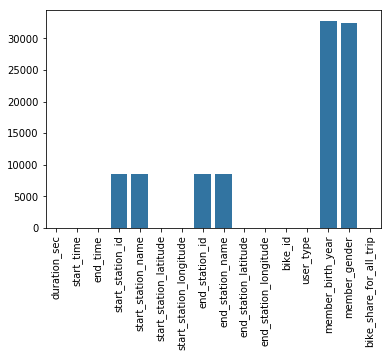

In [16]:
na_counts_subscriber = b18_subscriber.isna().sum()
sb.barplot(na_counts_subscriber.index.values, na_counts_subscriber, color = base_color);
plt.xticks(rotation = 90);

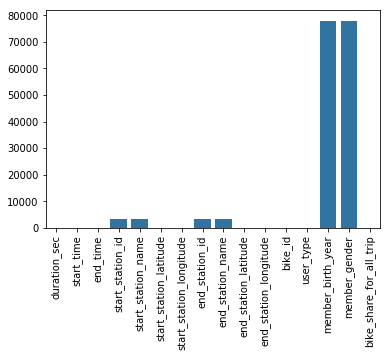

In [17]:
na_counts_customer = b18_customer.isna().sum()
sb.barplot(na_counts_customer.index.values, na_counts_customer, color = base_color);
plt.xticks(rotation = 90);

##### I can see, the user type is not NaN values reason, what every Subscriber or Customer, some people dosen't like provide personal information. So we just fill out 'Unknow' to member_gender NaN value. 
##### 8. column 'bike_share_for_all_trip' is not defined in the offical webside, I don't realy know what is its mean, so I will not analysis this column, drop it.

###  Data Cleaning
#### Bay area 2018
##### 1.column 'duration_sec' need to change unit to 'minutes'
##### Define: creat new column 'duration', its value equals 'duration_sec'/60, then drop column 'duration_sec'
##### Code:

In [18]:
b18['duration'] = b18['duration_sec']/60

In [19]:
b18.drop(columns = ['duration_sec'], inplace = True)

##### Test:

In [20]:
b18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
duration                   float64
dtypes: float64(8), int64(1), object(7)
memory usage: 227.5+ MB


In [21]:
b18.duration.describe()

count    1.863721e+06
mean     1.428838e+01
std      3.950631e+01
min      1.016667e+00
25%      5.833333e+00
50%      9.266667e+00
75%      1.453333e+01
max      1.439433e+03
Name: duration, dtype: float64

##### 2.columns 'start_time'  could be extraced more feature of time, like 'month', 'weekday', 'hour', before that we need change data type to datetime.
##### Define: use astype to change datetime, and creat 4 columns 'month', 'weekday','hour_start' from 'start_time, 'hour_end' from 'end_time'
##### Code:

In [22]:
b18['start_time'] = pd.to_datetime(b18['start_time'])
b18['end_time'] = pd.to_datetime(b18['end_time'])

In [23]:
b18['month'] = b18['start_time'].apply(lambda value: value.month)
b18['month'] = b18['month'].astype(dtype='category')

In [24]:
b18['weekday'] = b18['start_time'].apply(lambda value: value.strftime('%w'))
b18['weekday'] = b18['weekday'].astype(dtype='category')

In [25]:
b18['hour_start'] = b18['start_time'].apply(lambda value: value.hour)
b18['hour_end'] = b18['end_time'].apply(lambda value: value.hour)
b18['hour_start'] = b18['hour_start'].astype(dtype='category')
b18['hour_end'] = b18['hour_end'].astype(dtype='category')

##### Test:

In [26]:
b18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 20 columns):
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
duration                   float64
month                      category
weekday                    category
hour_start                 category
hour_end                   category
dtypes: category(4), datetime64[ns](2), float64(8), int64(1), object(5)
memory usage: 234.6+ MB


In [27]:
b18.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration,month,weekday,hour_start,hour_end
0,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,1254.733333,1,3,22,19
1,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No,1423.700000,1,3,16,15
2,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,1192.933333,1,3,14,10
3,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No,1017.933333,1,3,14,7
4,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,666.100000,1,3,19,6


##### 3. All station columns will be droped after extract one information: is it a round trip or one way trip.
##### Define: creat new column 'trip_route_category', if start station is same as end station, then value is 'Round Trip', else it's 'One Way'. And then drop station columns.
##### Code:

In [28]:
def one_way_or_not(start_lon,start_lat,end_lon,end_lat):
    if start_lon == end_lon:
        if start_lat == end_lat:
            return 'Round Trip'
        else:
            return 'One Way'
    else:
        return 'One Way'


In [29]:
b18['trip_route_category'] = b18.apply(lambda row: one_way_or_not(row.start_station_longitude, row.start_station_latitude,
                                                      row.end_station_longitude,row.end_station_latitude),axis=1)

In [30]:
b18['trip_route_category'] = b18['trip_route_category'].astype(dtype='category')

In [31]:
b18.trip_route_category.value_counts()

One Way       1807563
Round Trip      56158
Name: trip_route_category, dtype: int64

In [32]:
b18.drop(columns = ['start_station_id',
                    'start_station_name',
                    'start_station_latitude',
                    'start_station_longitude',
                    'end_station_id',
                    'end_station_name',
                    'end_station_latitude',
                    'end_station_longitude'], inplace = True)

##### Test:

In [33]:
b18.head()

,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration,month,weekday,hour_start,hour_end,trip_route_category
0,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Subscriber,1986.0,Male,No,1254.733333,1,3,22,19,One Way
1,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,2815,Customer,NaN,NaN,No,1423.700000,1,3,16,15,Round Trip
2,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Customer,1996.0,Male,No,1192.933333,1,3,14,10,One Way
3,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,321,Customer,NaN,NaN,No,1017.933333,1,3,14,7,One Way
4,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Subscriber,1991.0,Male,No,666.100000,1,3,19,6,One Way


##### 4. columns 'user_type' should be change type to category
##### Define: use astype function change to category
##### Code:

In [34]:
b18['user_type'] = b18['user_type'].astype(dtype = 'category')

##### Test:

In [35]:
b18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 13 columns):
start_time                 datetime64[ns]
end_time                   datetime64[ns]
bike_id                    int64
user_type                  category
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
duration                   float64
month                      category
weekday                    category
hour_start                 category
hour_end                   category
trip_route_category        category
dtypes: category(6), datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 110.2+ MB


##### 5. columns 'member_birth_year' should be change to another way of expression: age. Age is easy to analysis.
##### Define: Creat new column 'age_of_member', the value equals 2018-'member_birth_year'
##### Code:

In [36]:
b18['age_of_member'] = 2018-b18['member_birth_year']

In [37]:
b18.age_of_member.describe()

count    1.753003e+06
mean     3.491204e+01
std      1.044289e+01
min      1.800000e+01
25%      2.700000e+01
50%      3.300000e+01
75%      4.000000e+01
max      1.370000e+02
Name: age_of_member, dtype: float64

In [38]:
b18.drop(columns = ['member_birth_year'], inplace = True)

##### Test:

In [39]:
b18.head()

,start_time,end_time,bike_id,user_type,member_gender,bike_share_for_all_trip,duration,month,weekday,hour_start,hour_end,trip_route_category,age_of_member
0,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Subscriber,Male,No,1254.733333,1,3,22,19,One Way,32.0
1,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,2815,Customer,NaN,No,1423.700000,1,3,16,15,Round Trip,NaN
2,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Customer,Male,No,1192.933333,1,3,14,10,One Way,22.0
3,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,321,Customer,NaN,No,1017.933333,1,3,14,7,One Way,NaN
4,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Subscriber,Male,No,666.100000,1,3,19,6,One Way,27.0


##### 6. To fill  'member_gender' null value with 'unknow', and change column to category
##### Define: Use fillna and astype function
##### Code:

In [40]:
b18.member_gender.value_counts()

Male      1288085
Female     438188
Other       27081
Name: member_gender, dtype: int64

In [41]:
b18.member_gender.fillna(value = 'Unknow', inplace = True)

In [42]:
b18['member_gender'] = b18['member_gender'].astype(dtype = 'category')

##### Test:

In [43]:
b18.member_gender.value_counts()

Male      1288085
Female     438188
Unknow     110367
Other       27081
Name: member_gender, dtype: int64

In [44]:
b18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 13 columns):
start_time                 datetime64[ns]
end_time                   datetime64[ns]
bike_id                    int64
user_type                  category
member_gender              category
bike_share_for_all_trip    object
duration                   float64
month                      category
weekday                    category
hour_start                 category
hour_end                   category
trip_route_category        category
age_of_member              float64
dtypes: category(7), datetime64[ns](2), float64(2), int64(1), object(1)
memory usage: 97.8+ MB


##### 7.To drop 'bike_share_for_all_trip'
##### Define: use drop function
##### Code:

In [45]:
b18.drop(columns = ['bike_share_for_all_trip'], inplace = True)

##### Test:

In [46]:
b18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 12 columns):
start_time             datetime64[ns]
end_time               datetime64[ns]
bike_id                int64
user_type              category
member_gender          category
duration               float64
month                  category
weekday                category
hour_start             category
hour_end               category
trip_route_category    category
age_of_member          float64
dtypes: category(7), datetime64[ns](2), float64(2), int64(1)
memory usage: 83.5 MB


#### Save clean DataFrame to csv file 

In [47]:
b18.to_csv('bay2018_clean.csv',encoding='utf-8', index=False)

## Exploration Data Analysis
### 1.Univariate exploration of Bay area 2018 bike share data. 

In [48]:
b18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 12 columns):
start_time             datetime64[ns]
end_time               datetime64[ns]
bike_id                int64
user_type              category
member_gender          category
duration               float64
month                  category
weekday                category
hour_start             category
hour_end               category
trip_route_category    category
age_of_member          float64
dtypes: category(7), datetime64[ns](2), float64(2), int64(1)
memory usage: 83.5 MB


In [49]:
#define a function for proportion of histogram for each varible
def plot_prop(df,var):
    n_point = df.shape[0]
    max_count = df[var].value_counts().max()
    max_prop = max_count / n_point
    tick_props = np.arange(0, max_prop+0.1, 0.1)
    tick_names = ['{:0.1f}'.format(v) for v in tick_props]
    
    ax = sb.countplot(data = df, x=var ,color=base_color);
    plt.yticks(tick_props * n_point, tick_names);
    plt.ylabel('Proportion');

    counts = df[var].value_counts()
    locs, labels = plt.xticks()

    for loc, label in zip(locs, labels):
        count = counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_point)
        plt.text(loc, count, pct_string, ha = 'center', color = 'black')
        
    return ax

In [50]:
plt.style.use('ggplot')
sb.set_palette("muted")

##### First, let's explore the user feature: gender, user type, age.
##### plot bike trip count by member's gender.

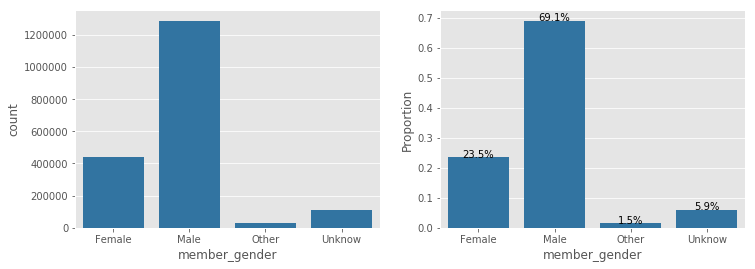

In [51]:
plt.figure(figsize=[12,4]);

plt.subplot(1,2,1);
sb.countplot(data=b18,x='member_gender',color=base_color);

plt.subplot(1,2,2);
plot_prop(b18,'member_gender');

##### I can see, around 1.8 million trips, there are 63.1% Male customers, 23.5% Female customers, and 1.5% customers choose gender 'other', 5.9% customers didn't provide gender information.

##### Next, we take a look about customers type, there are two types of customer, 'customer' and 'subscriber'. 
###### “Subscriber” = Member, “Customer” = Casual

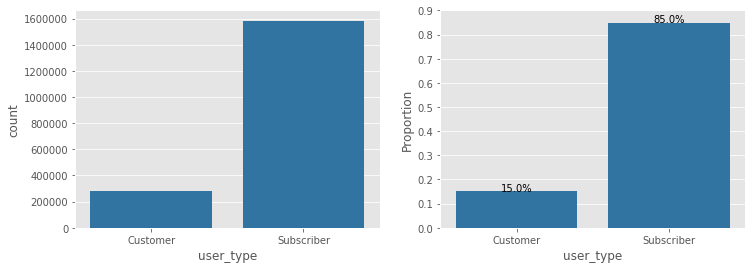

In [52]:
plt.figure(figsize=[12,4]);

plt.subplot(1,2,1);
sb.countplot(data=b18,x='user_type',color=base_color);

plt.subplot(1,2,2);
plot_prop(b18,'user_type');

##### 85.0% user are membership, 15.0% user are casual.

##### And next, what is the user age distribution

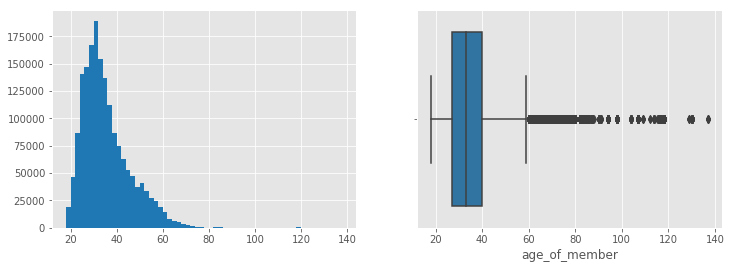

In [53]:
plt.figure(figsize=[12,4]);

plt.subplot(1,2,1);
plt.hist(data=b18, x='age_of_member',bins = np.arange(18,138+2,2),color=base_color);

plt.subplot(1,2,2);
sb.boxplot(data = b18, x = 'age_of_member',color=base_color);


##### There a age limit '18 years old', so the minimun age is 18. But there is no upper limit of age, so the highest age is 137 years old. I think they are wrong informations. But we couldn't find the correct information. Let's just check the box plot, we can see the most user ages are between 18-60, and 50% user ages are around 30's. 

##### After user feature, I will explore the trip feature.
##### First, 'One Way' or 'Round Trip'

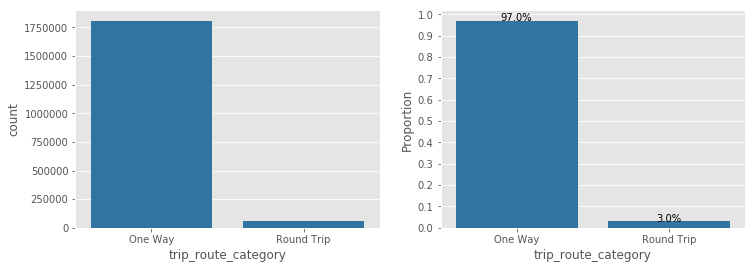

In [54]:
plt.figure(figsize=[12,4]);

plt.subplot(1,2,1);
sb.countplot(data=b18,x='trip_route_category',color=base_color);

plt.subplot(1,2,2);
plot_prop(b18,'trip_route_category');

##### There are 97.0% trip is One Way, only 3.0% is round trip.

##### Next, how about duration, this is a numeric variables.

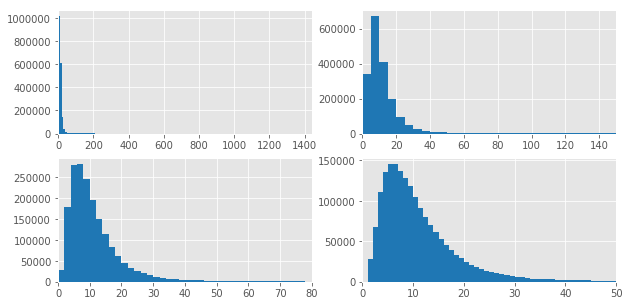

In [55]:
plt.figure(figsize=[10,5]);

plt.subplot(2,2,1);
bin_duration = np.arange(0, b18['duration'].max()+10,10);
plt.hist(data=b18, x = 'duration', bins = bin_duration, color=base_color);
plt.xlim(0,1440);

plt.subplot(2,2,2);
bin_duration = np.arange(0, 150+5, 5);
plt.hist(data=b18, x = 'duration', bins = bin_duration, color=base_color);
plt.xlim(0,150);

plt.subplot(2,2,3);
bin_duration = np.arange(0, 80+2, 2);
plt.hist(data=b18, x = 'duration', bins = bin_duration, color=base_color);
plt.xlim(0,80);

plt.subplot(2,2,4);
bin_duration = np.arange(0, 50+1, 1);
plt.hist(data=b18, x='duration', bins = bin_duration, color=base_color);
plt.xlim(0,50);

##### I did plot 4 times histogram for duration variable. To try zoom in it. Most duration is centered in 10 minutes. But the are a lot of value distribute in far away. I should change the x-axis scale to 'log'.

In [56]:
b18['duration'].describe()

count    1.863721e+06
mean     1.428838e+01
std      3.950631e+01
min      1.016667e+00
25%      5.833333e+00
50%      9.266667e+00
75%      1.453333e+01
max      1.439433e+03
Name: duration, dtype: float64

In [57]:
np.log10(b18['duration'].describe())

count    6.270381
mean     1.154983
std      1.596667
min      0.007179
25%      0.765917
50%      0.966924
75%      1.162365
max      3.158192
Name: duration, dtype: float64

Text(0, 0.5, 'Count')

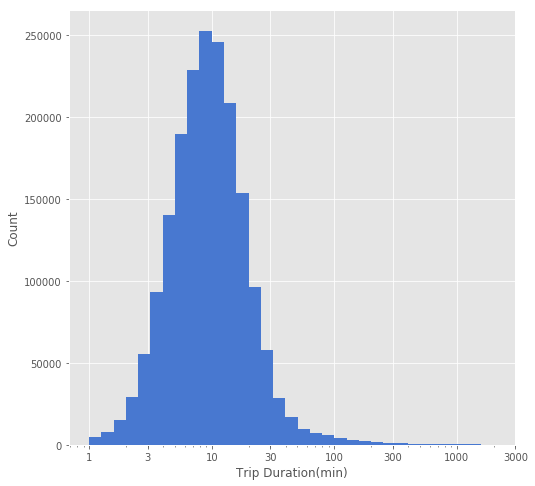

In [58]:
plt.figure(figsize=[8,8])
bin_duration = 10**np.arange(0, 3.3+0.1, 0.1)
ticks = [1,3,10,30,100,300,1000,3000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(b18.duration, bins = bin_duration);
plt.xscale('log');
plt.xticks(ticks, labels);
plt.xlabel('Trip Duration(min)')
plt.ylabel('Count')
#plt.grid(True, alpha = 1/2)

##### Now it is looks like normal distribution.  we can see the most duration are centered in 3-30 minutes.

##### So, what is next feature trip time. Is there any difference between 'Month', 'Day', or 'Hour'?

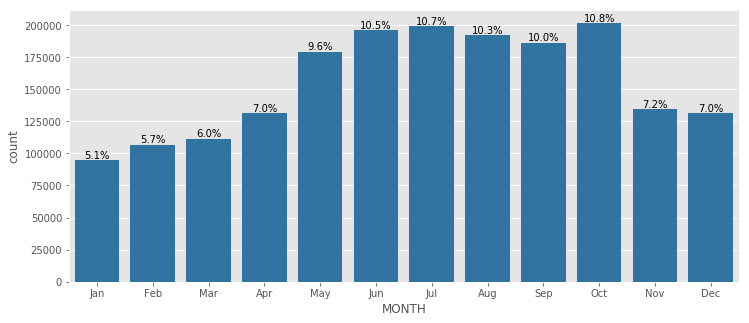

In [59]:
plt.figure(figsize=[12,5]);
month_ticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

ax = sb.countplot(x='month', data=b18, color = base_color)

plt.xlabel('MONTH')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/b18.shape[0]), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

ax.set_xticklabels(month_ticks);

##### I can see, from May to Oct are more busy than others, is is mean that summer is more people use bike share?

##### let's check it by day first.

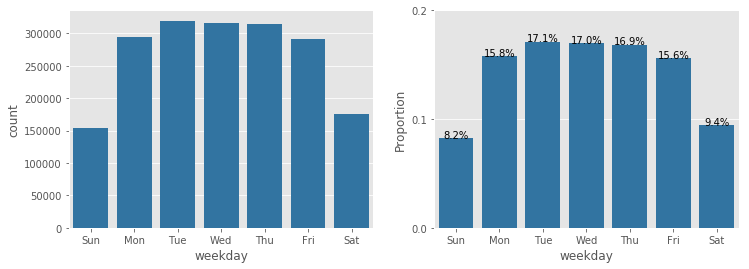

In [60]:
plt.figure(figsize=[12,4]);
day_ticks = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']

plt.subplot(1,2,1);
ax = sb.countplot(data=b18,x='weekday',color=base_color);
ax.set_xticklabels(day_ticks);

plt.subplot(1,2,2);
ax = plot_prop(b18,'weekday');
ax.set_xticklabels(day_ticks);

##### I see that the weekday are more busy than weekend. What about 'Hour'?

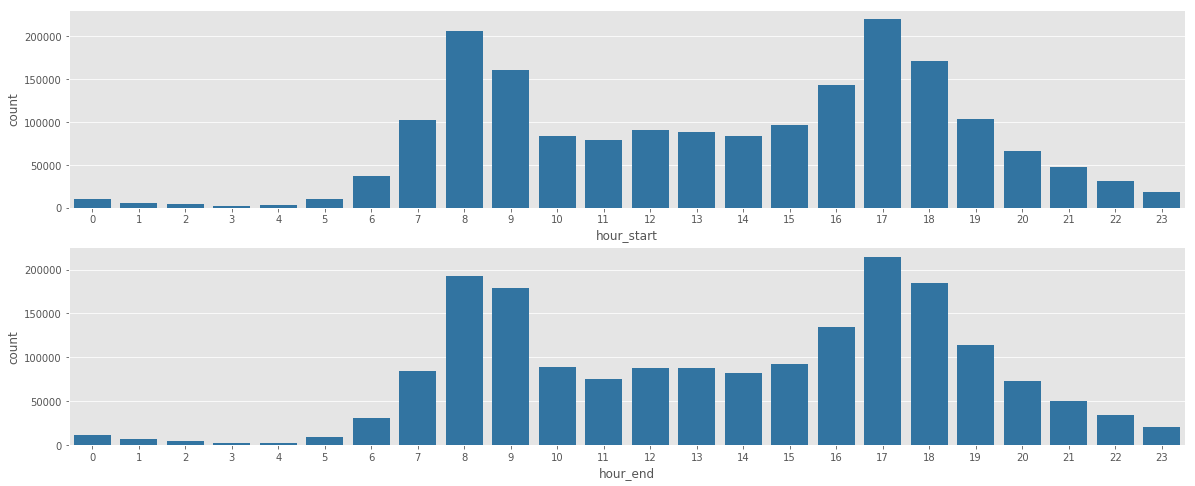

In [61]:
plt.figure(figsize=[20,8]);

plt.subplot(2,1,1)
sb.countplot(data=b18,x='hour_start',color=base_color);

plt.subplot(2,1,2)
sb.countplot(data=b18,x='hour_end',color=base_color);

##### Here is very obvious distribution of hour. Most trip occur in commuting time.
##### To combine the day and hour plot, we can say, the most user are using bike for going to work or home. But I think it is not all.

### 2.Multivariate exploration of Bay area 2018 bike share data.
##### First, we check the relationship between user gender and type.

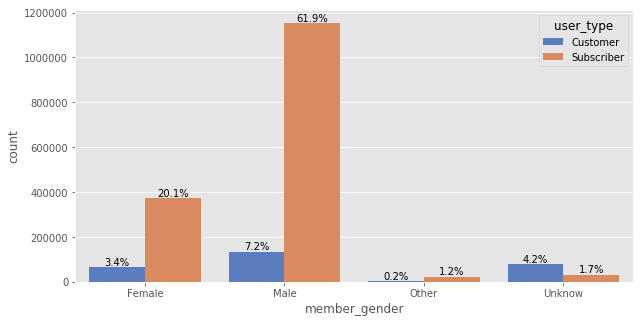

In [62]:
plt.figure(figsize=[10,5]);
ax = sb.countplot(data = b18, x = 'member_gender', hue = 'user_type')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/b18.shape[0]), (x.mean(), y), 
            ha='center', va='bottom') 

##### Only the 'Unknow' gender has more Casual user than subscriber user.


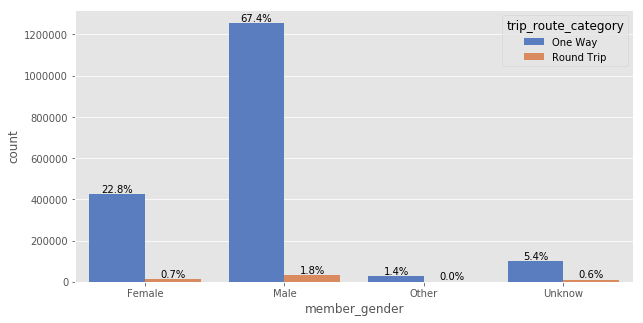

In [63]:
plt.figure(figsize=[10,5]);
ax = sb.countplot(data = b18, x = 'member_gender', hue = 'trip_route_category')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/b18.shape[0]), (x.mean(), y), 
            ha='center', va='bottom') 

##### As we know, round trip is only 3.0% of all trip, but in 'Unknow' gender, round trip is 11%.
##### How about raletionship between age and gender?

C:\Users\james\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


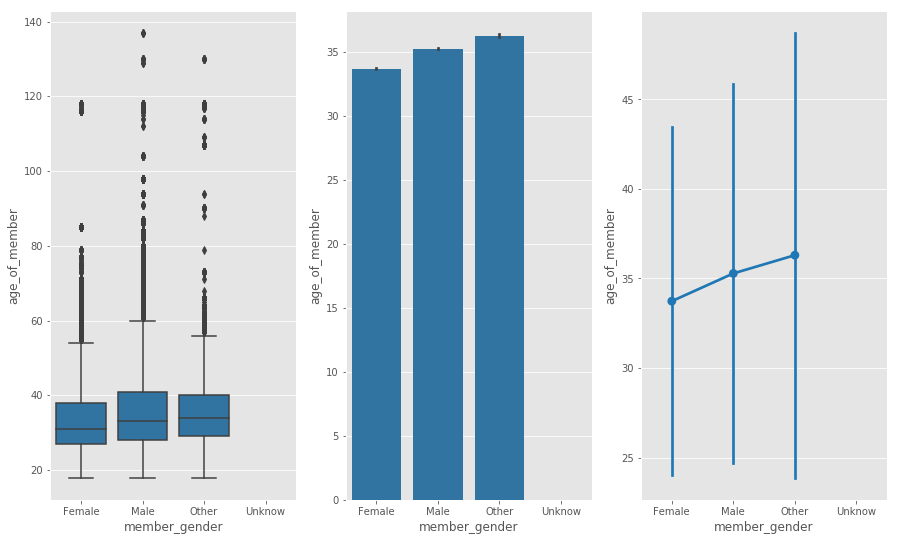

In [64]:
plt.figure(figsize=[15,9]);

plt.subplot(1,3,1)
sb.boxplot(data = b18, x = 'member_gender',y = 'age_of_member',color=base_color);

plt.subplot(1,3,2)
sb.barplot(data = b18, x =  'member_gender', y = 'age_of_member',color=base_color);

plt.subplot(1,3,3)
sb.pointplot(data = b18, x =  'member_gender', y = 'age_of_member',color=base_color, ci = 'sd');

##### Male user's age has wider distribution, but the mean of male user's age is not highest, the 'Other' age is.
##### How about user type with age.

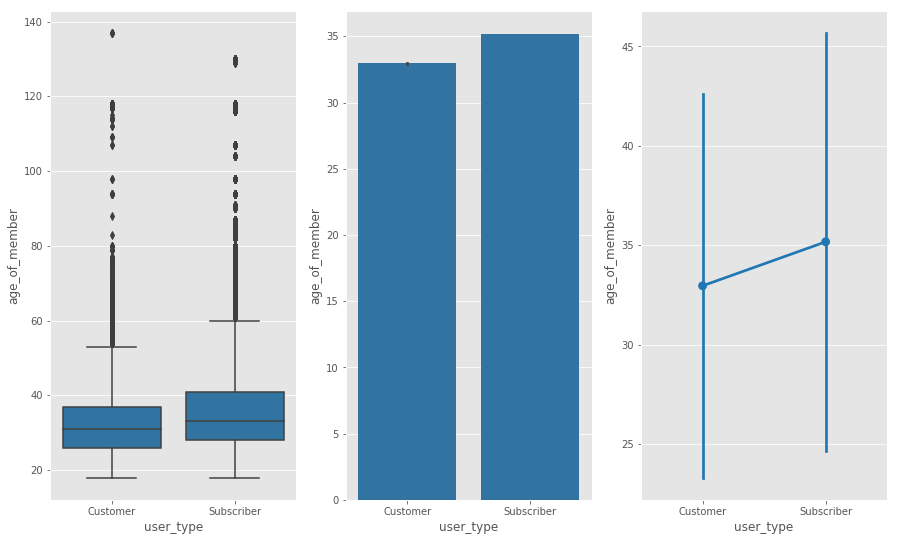

In [65]:
plt.figure(figsize=[15,9]);

plt.subplot(1,3,1)
sb.boxplot(data = b18, x = 'user_type',y = 'age_of_member',color=base_color);

plt.subplot(1,3,2)
sb.barplot(data = b18, x =  'user_type', y = 'age_of_member',color=base_color);

plt.subplot(1,3,3)
sb.pointplot(data = b18, x =  'user_type', y = 'age_of_member',color=base_color, ci = 'sd');

##### The Subscriber user's age mean is higher than casual user's.
##### Next, let's look at that duration and age. Those are two numerical variable, so I will plot scatter.

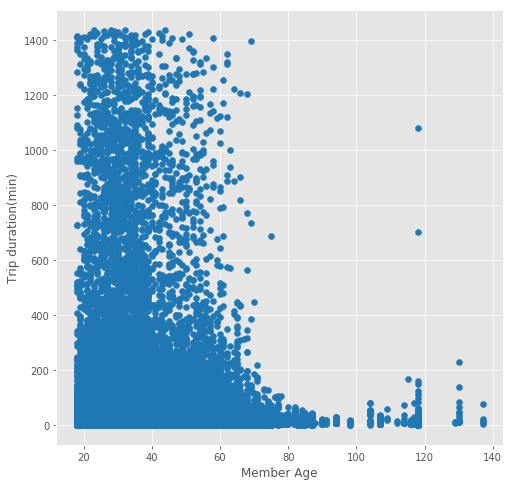

In [66]:
plt.figure(figsize=[8,8]);
plt.scatter(b18['age_of_member'], b18['duration'], color=base_color);
plt.xlabel('Member Age');
plt.ylabel('Trip duration(min)');

##### Same as before, the data is centered 10 minutes, but its distribution from 1 to 1440, I need change the y-axis scale to 'log'.

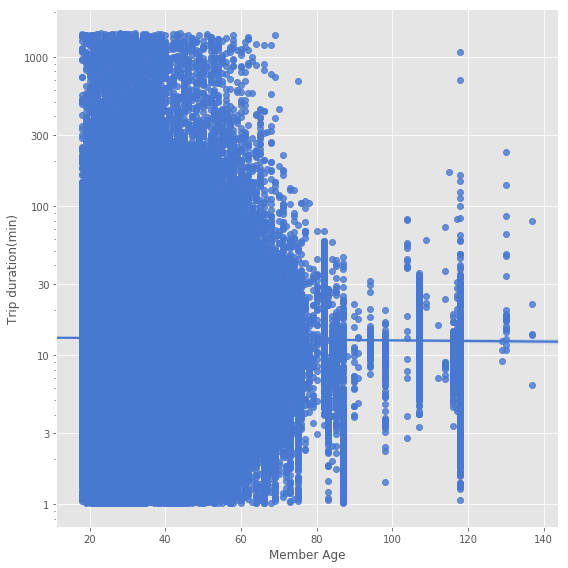

In [67]:
ticks = [1,3,10,30,100,300,1000]
labels = ['{}'.format(v) for v in ticks]
sb.lmplot(data = b18,x = 'age_of_member', y = 'duration', height = 8);
plt.yscale('log');
plt.yticks(ticks, labels);
plt.xlabel('Member Age');
plt.ylabel('Trip duration(min)');

##### How is the linear raletionship? The plot shows that trip duration doesn't change by user's age.
##### Now I want to check if the ralationship between age and duration has diffrent with gender. I will creat 3 DataFrame for 'male', 'female','other'. Because gender 'Unknow' has no age information.

In [68]:
b18_male = b18.loc[b18['member_gender'] == 'Male']
b18_female = b18.loc[b18['member_gender'] == 'Female']
b18_other = b18.loc[b18['member_gender'] == 'Other']

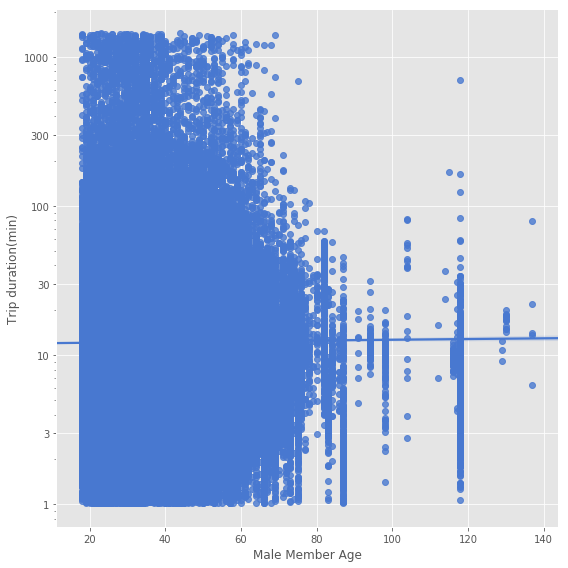

In [69]:
sb.lmplot(data = b18_male, x = 'age_of_member', y = 'duration', height = 8);
plt.yscale('log');
plt.yticks(ticks, labels);
plt.xlabel('Male Member Age');
plt.ylabel('Trip duration(min)');

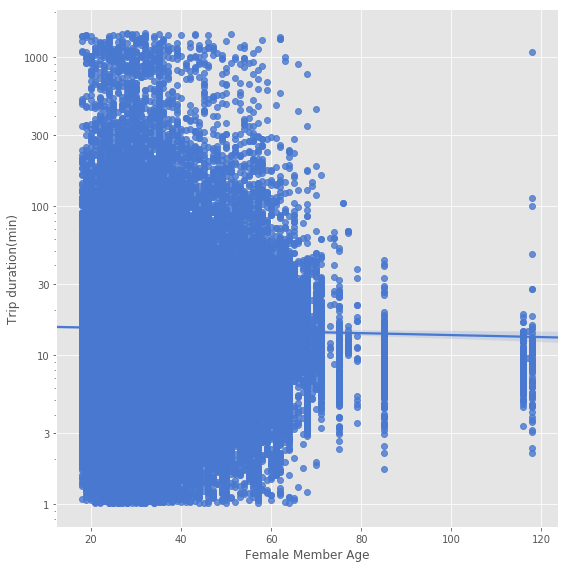

In [70]:
sb.lmplot(data = b18_female, x = 'age_of_member', y = 'duration', height = 8);
plt.yscale('log');
plt.yticks(ticks, labels);
plt.xlabel('Female Member Age');
plt.ylabel('Trip duration(min)');

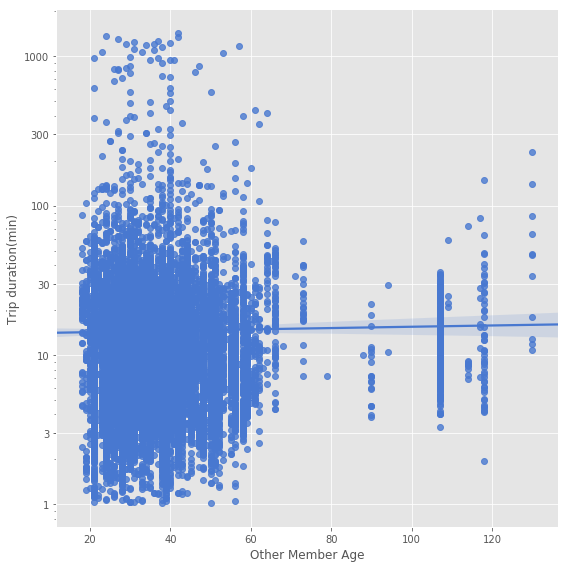

In [71]:
sb.lmplot(data = b18_other,x = 'age_of_member', y = 'duration', height = 8);
plt.yscale('log');
plt.yticks(ticks, labels);
plt.xlabel('Other Member Age');
plt.ylabel('Trip duration(min)');

##### No matter what gender user is, there are no positive or nagetive linear relationship, the regression line shows more like parallel with x axis.
##### How about user type with age and duration?

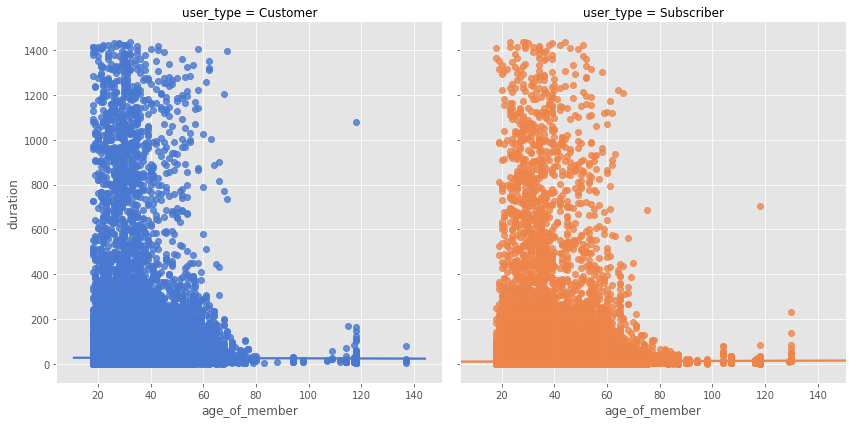

In [72]:
sb.lmplot(data = b18, x = 'age_of_member', y = 'duration',col = 'user_type',hue = 'user_type', height = 6);

##### How about trip route?

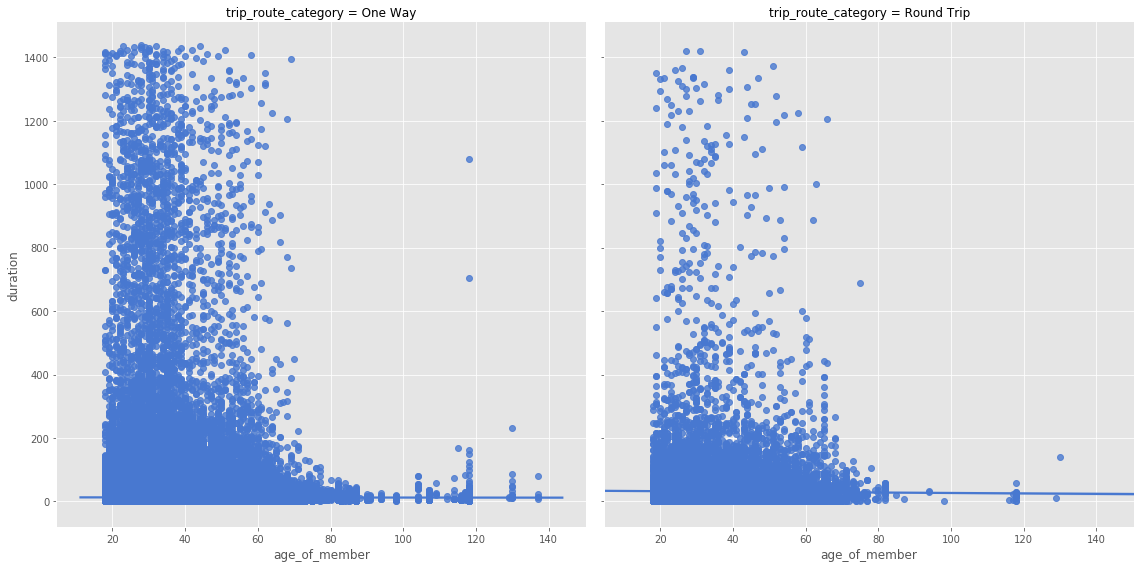

In [73]:
sb.lmplot(data = b18, x = 'age_of_member', y = 'duration',col = 'trip_route_category', height = 8);

##### We can see the two parallel lines, there is no positive or nagetive, only thing we can say is that the duration of round trip is little bit higher than one way, that's make sence.
##### Untill now, I did't find any positive or nagetive linear relationship between the two numeric variable 'duration' and 'age_of_member' , no matter how to split the data by user feature. So the road is end! Next, I need to analys by time feature.

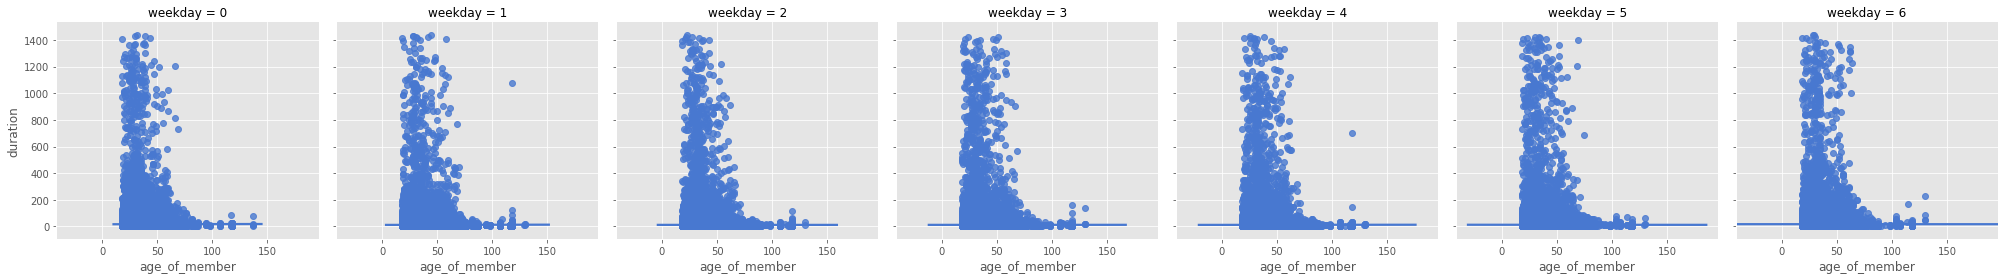

In [74]:
sb.lmplot(data = b18, x = 'age_of_member', y = 'duration',col = 'weekday', height = 4);

##### Let's change to another way, duration count, mean and sum. I will group by time feature 'month', 'day', 'hour'
##### 1. Duration count. time feature : 'month' and 'hour'(only use trip start hour)

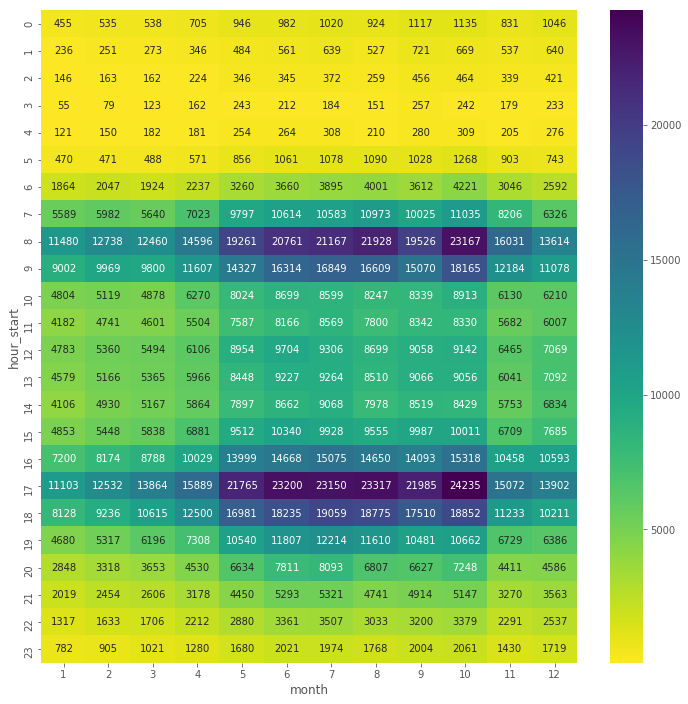

In [75]:
plt.figure(figsize=[12,12]);
mo_hour_counts = b18.groupby(['month','hour_start']).size()
mo_hour_counts = mo_hour_counts.reset_index(name = 'count')
mo_hour_counts = mo_hour_counts.pivot(index = 'hour_start', columns = 'month', values = 'count')
sb.heatmap(mo_hour_counts, annot = True, fmt = 'd',cmap = 'viridis_r');

##### The highlight shows  commuting time on summer.
##### 2. Duration count. Time feature : 'month' and 'day'

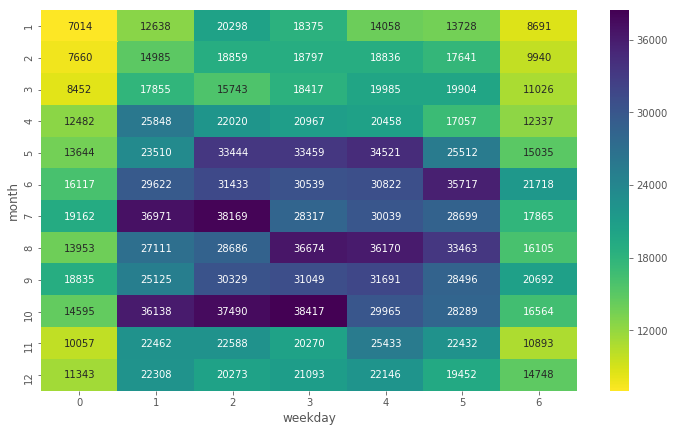

In [76]:
plt.figure(figsize=[12,7]);
mo_week_counts = b18.groupby(['month','weekday']).size()
mo_week_counts = mo_week_counts.reset_index(name = 'counts')
mo_week_counts = mo_week_counts.pivot(index = 'month', columns = 'weekday', values = 'counts')

sb.heatmap(mo_week_counts, annot = True, fmt='d',cmap = 'viridis_r');

##### The highlight shows summer's weekday.
##### 3. Duration count. time feature : 'day' and 'hour'

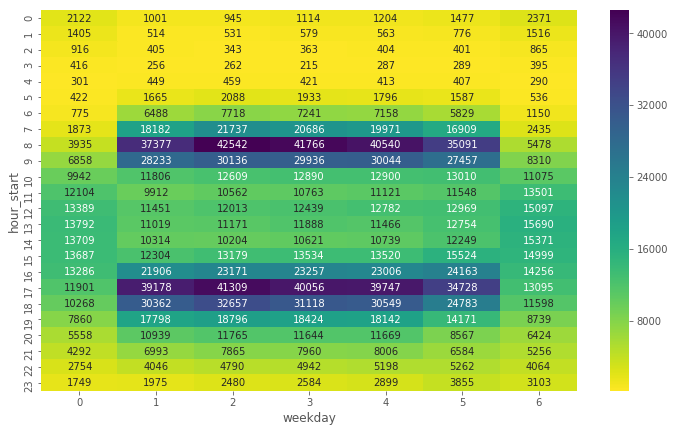

In [77]:
plt.figure(figsize=[12,7]);
week_hour_counts = b18.groupby(['weekday','hour_start']).size()
week_hour_counts = week_hour_counts.reset_index(name = 'counts')
week_hour_counts = week_hour_counts.pivot(index = 'hour_start', columns = 'weekday', values = 'counts')

sb.heatmap(week_hour_counts, annot = True, fmt = 'd', cmap = 'viridis_r');

##### This heatmap shows very significant highlight zone, weekday's commuting time.
##### Now I want to say the bikeshare is lots of them for commuting
##### Next I want to look at duration sum and mean
##### 4. Duration sum, time feature 'month', 'day'

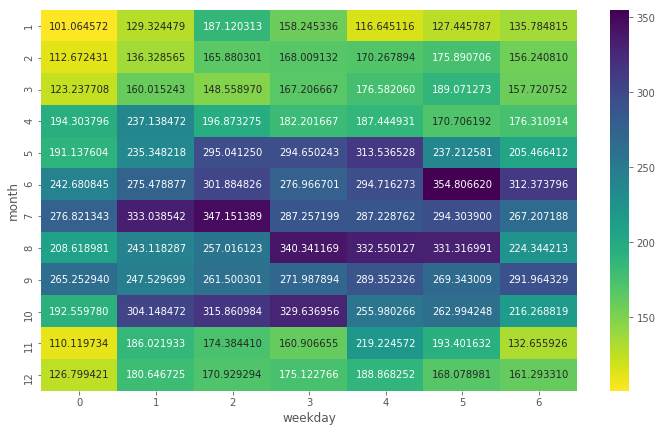

In [78]:
mon_week_sum = b18.groupby(['month','weekday']).sum()['duration']/1440
mon_week_sum = mon_week_sum.reset_index(name = 'sum')
mon_week_sum = mon_week_sum.pivot(index = 'month', columns = 'weekday', values = 'sum')
plt.figure(figsize = [12,7])
sb.heatmap(mon_week_sum, annot = True, fmt = 'f', cmap = 'viridis_r');

##### 5 Duration sum, time feature 'hour', 'day'

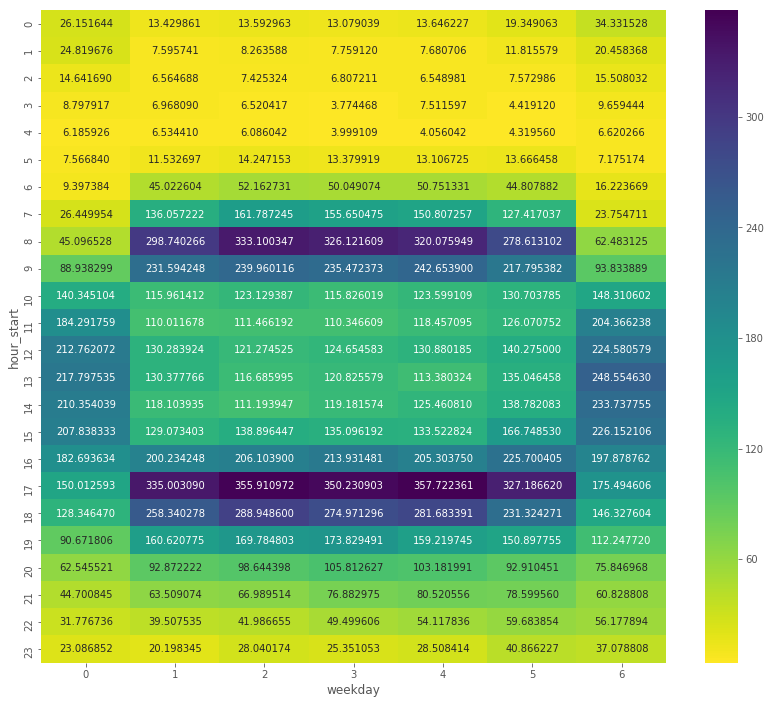

In [79]:
hour_week_sum = b18.groupby(['hour_start','weekday']).sum()['duration']/1440
hour_week_sum = hour_week_sum.reset_index(name = 'sum')
hour_week_sum = hour_week_sum.pivot(index = 'hour_start', columns = 'weekday', values = 'sum')
plt.figure(figsize = [14,12])
sb.heatmap(hour_week_sum, annot = True, fmt = 'f', cmap = 'viridis_r');

##### We can see the the weekend noon is more busy than weekday noon. So I guess, the bikeshare is lots for visiter on weekend.
##### 6. Duration sum, time feature 'hour','month'

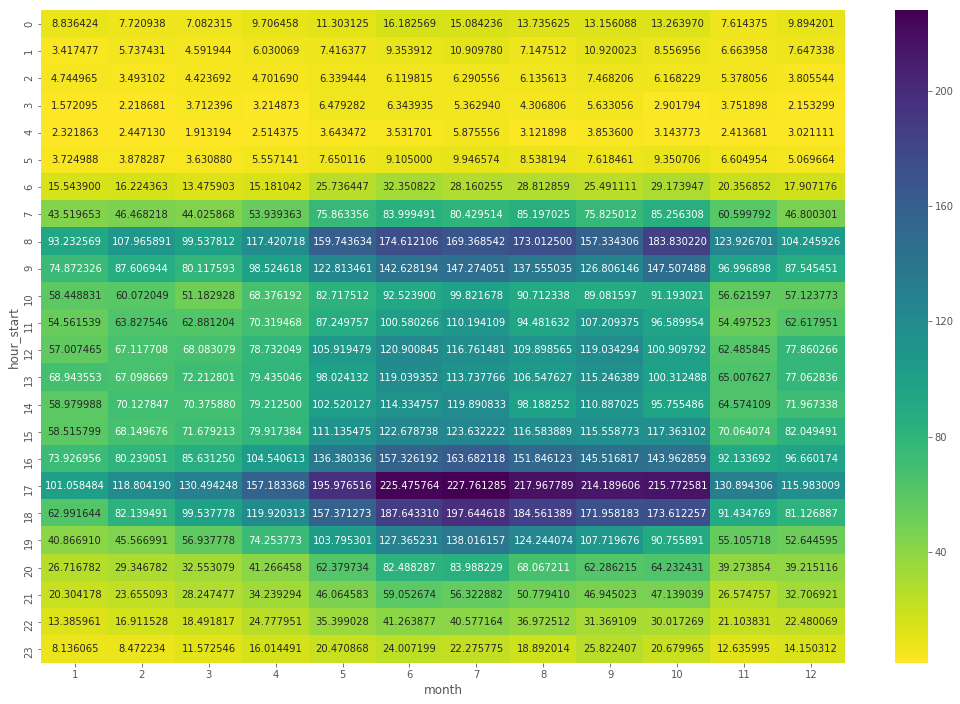

In [80]:
hour_mon_sum = b18.groupby(['hour_start','month']).sum()['duration']/1440
hour_mon_sum = hour_mon_sum.reset_index(name = 'sum')
hour_mon_sum = hour_mon_sum.pivot(index = 'hour_start', columns = 'month', values = 'sum')
plt.figure(figsize = [18,12])
sb.heatmap(hour_mon_sum, annot = True, fmt = 'f', cmap = 'viridis_r');

##### The same highlight on summer commuting time.
##### Next, duration mean.
##### 7. Duration mean, 'month','day'

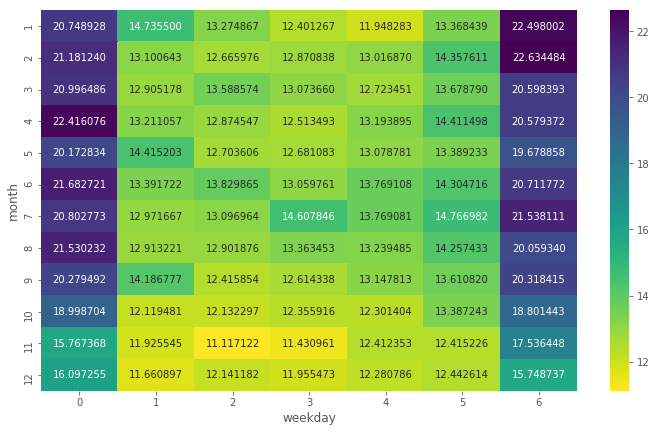

In [81]:
mon_week_mean = b18.groupby(['month','weekday']).mean()['duration']
mon_week_mean = mon_week_mean.reset_index(name = 'duration')
mon_week_mean = mon_week_mean.pivot(index = 'month', columns = 'weekday', values = 'duration')
plt.figure(figsize = [12,7])
sb.heatmap(mon_week_mean, annot = True, fmt = 'f', cmap = 'viridis_r');

##### Now it is a big diffrent with previous heatmap, weekend duration mean is higher than weekday. Even weekend's duration sum or count are less than weekday's, but here we found that the mean of duration is diffrent. So I can say, on weekend, people would like spend more time on travel by bike, but on weekday, people use bikeshare for going to work and home in a short time.
##### 8. Duration mean, time feature, 'hour','day'

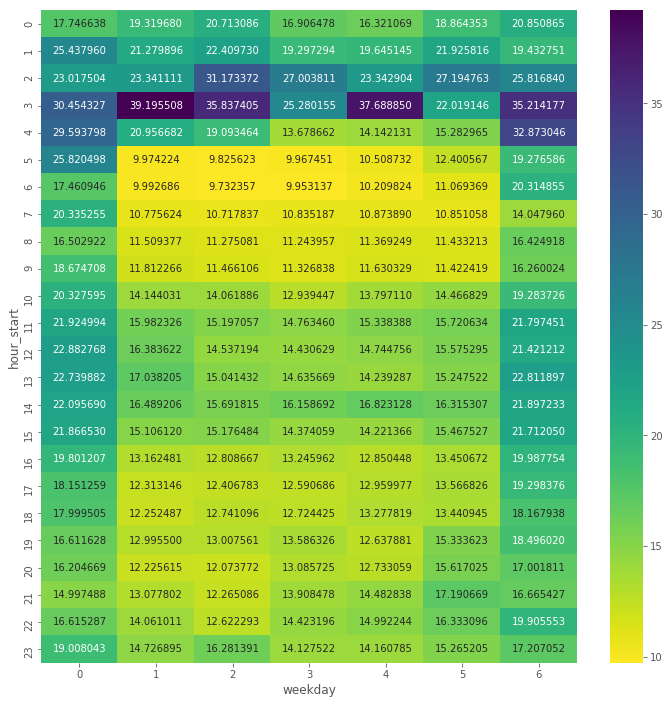

In [82]:
hour_week_mean = b18.groupby(['hour_start','weekday']).mean()['duration']
hour_week_mean = hour_week_mean.reset_index(name = 'duration')
hour_week_mean = hour_week_mean.pivot(index = 'hour_start', columns = 'weekday', values = 'duration')
plt.figure(figsize = [12,12])
sb.heatmap(hour_week_mean, annot = True, fmt = 'f', cmap = 'viridis_r');

##### I don't know why people take bike at midnight and use it for long time, so I can not say any deduction. But I can see between the two commuting time, user take bike for little bit longer time. And same deduction with previous heatmap, weekend's duration is longer than weekday's.
##### 9 duration mean, time feature, 'hour', 'month'

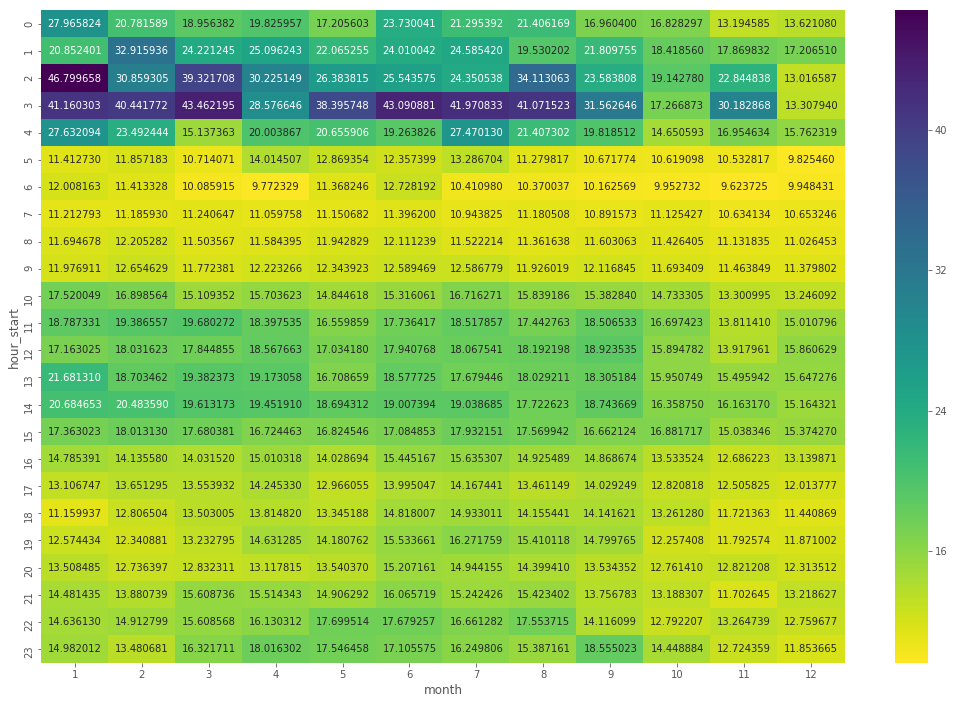

In [83]:
hour_mon_mean = b18.groupby(['hour_start','month']).mean()['duration']
hour_mon_mean = hour_mon_mean.reset_index(name = 'duration')
hour_mon_mean = hour_mon_mean.pivot(index = 'hour_start', columns = 'month', values = 'duration')
plt.figure(figsize = [18,12])
sb.heatmap(hour_mon_mean, annot = True, fmt = 'f', cmap = 'viridis_r');

##### Here is same deduction with #8.
##### Next I will analys what kind of user take longer time by bikeshare.
##### Let's put them togather, gender, trip category, and caculate duration mean and standard diviation. 

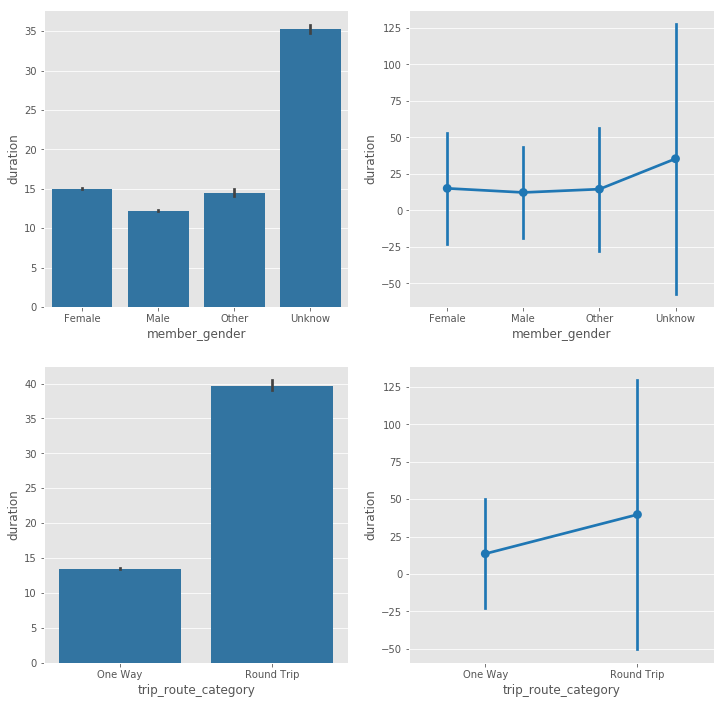

In [84]:
plt.figure(figsize=[12,12]);

plt.subplot(2,2,1)
sb.barplot(data = b18, x =  'member_gender', y = 'duration',color=base_color);

plt.subplot(2,2,2)
sb.pointplot(data = b18, x =  'member_gender', y = 'duration',color=base_color, ci = 'sd');

plt.subplot(2,2,3)
sb.barplot(data = b18, x = 'trip_route_category', y = 'duration',color=base_color);

plt.subplot(2,2,4)
sb.pointplot(data = b18, x = 'trip_route_category', y = 'duration',color=base_color, ci = 'sd');

##### The bike trip duration mean of 'Unknow' gender is higher than 'Male' gender almost 2 times. and round trip's duration mean higher than one way's 2 times. Let's make a heatmap for them.

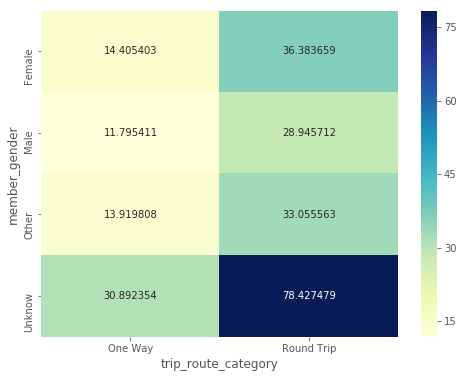

In [85]:
gender_oneway_duration = b18.groupby(['member_gender','trip_route_category']).mean()['duration']
gender_oneway_duration = gender_oneway_duration.reset_index(name = 'duration')
gender_oneway_duration = gender_oneway_duration.pivot(index = 'member_gender', columns = 'trip_route_category', values = 'duration')
plt.figure(figsize = [8,6])
sb.heatmap(gender_oneway_duration, annot = True, fmt = 'f', cmap = 'YlGnBu')

##### The lowest bike trip duration is 'Male' & 'One Way', the highest bike trip duration is 'Unknow' &'Round Trip'. Seven times the difference.
##### Let's add a time feature 'day'

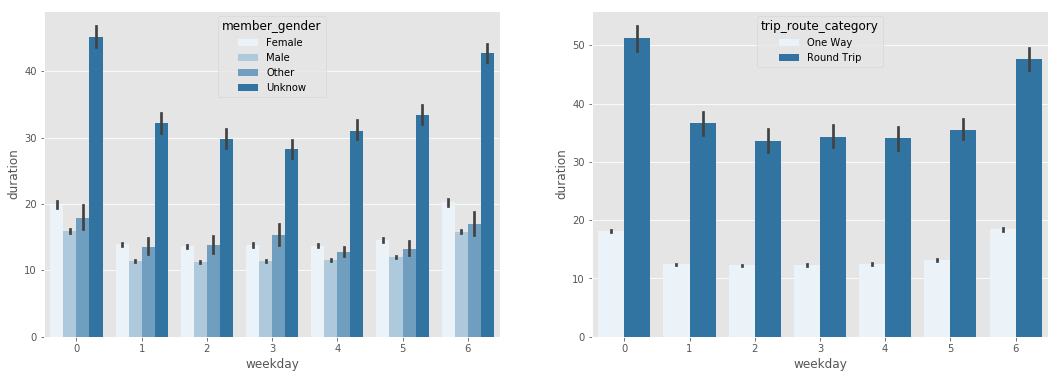

In [86]:
plt.figure(figsize=[18,6]);
plt.subplot(1,2,1)
sb.barplot(data = b18, x =  'weekday', y = 'duration', hue = 'member_gender',color=base_color);

plt.subplot(1,2,2)
sb.barplot(data = b18, x =  'weekday', y = 'duration', hue = 'trip_route_category',color=base_color);

##### The general trend is not diffrent with previous heatmap. 
##### Let's plot more feature together, user gender, type, duration mean and day.

C:\Users\james\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\james\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


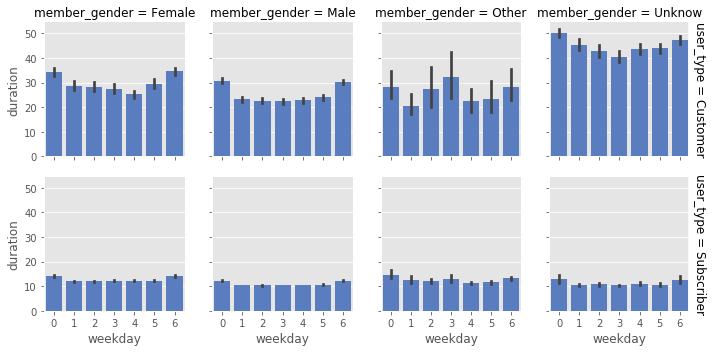

In [90]:
g = sb.FacetGrid(data = b18, col = 'member_gender', row = 'user_type', size = 2.5,
                margin_titles = True)
g.map(sb.barplot, 'weekday', 'duration')

##### Subscriber user average duration lower than casual user, and subscriber trip duration is almost even time in any day, casual user weekend trip duration higher than weekday.
##### Next, add trip route type

C:\Users\james\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\james\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


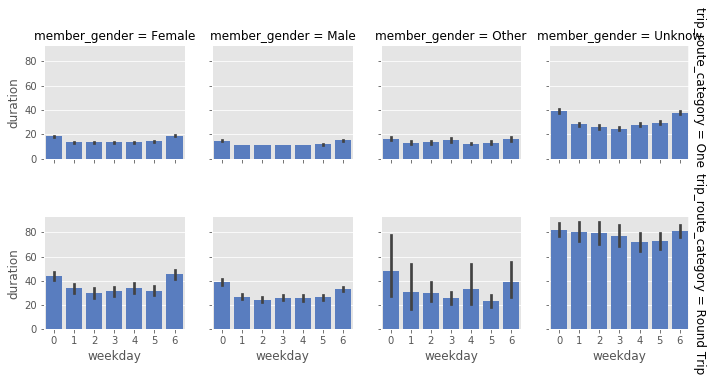

In [91]:
g = sb.FacetGrid(data = b18, col = 'member_gender', row = 'trip_route_category', size = 2.5,
                margin_titles = True)
g.map(sb.barplot, 'weekday', 'duration')

##### One way duration less than round trip, it's make sence.
##### Next, let's go back to trip count. Let's check diffrent user take bikeshare in a week, how is it diffrent. I set share y to False, because, the count has very big gap, if I use same y ticks, I can't see trend.

C:\Users\james\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\james\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


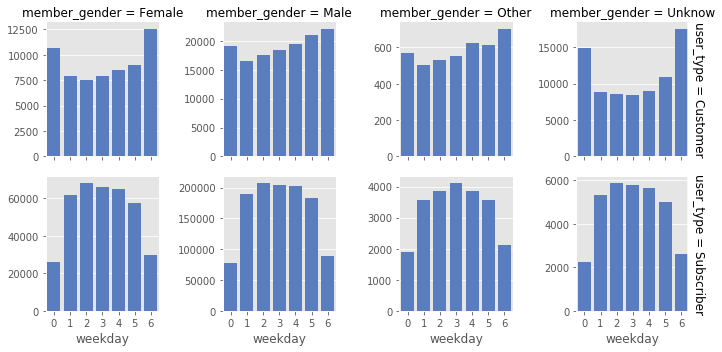

In [92]:
g = sb.FacetGrid(data = b18, col = 'member_gender', row = 'user_type', size = 2.5,
                margin_titles = True, sharey = False)
g.map(sb.countplot, 'weekday')

##### Now let's change user type to trip type.

C:\Users\james\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\james\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


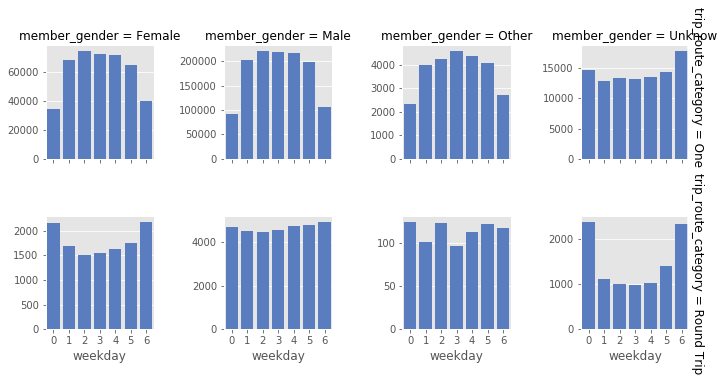

In [93]:
g = sb.FacetGrid(data = b18, col = 'member_gender', row = 'trip_route_category', size = 2.5,
                margin_titles = True, sharey=False)
g.map(sb.countplot, 'weekday')

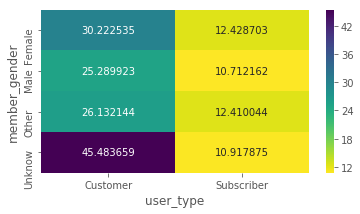

In [96]:
gender_user_duration = b18.groupby(['member_gender','user_type']).mean()['duration']
gender_user_duration = gender_user_duration.reset_index(name = 'duration')
gender_user_duration = gender_user_duration.pivot(index = 'member_gender', columns = 'user_type', values = 'duration')
plt.figure(figsize=[6,3]);
sb.heatmap(gender_user_duration, annot = True, fmt = 'f', cmap = 'viridis_r');

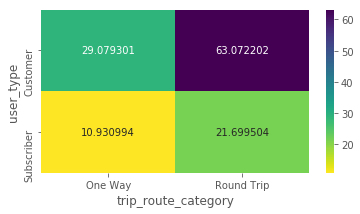

In [97]:
user_oneway_duration = b18.groupby(['user_type','trip_route_category']).mean()['duration']
user_oneway_duration = user_oneway_duration.reset_index(name = 'duration')
user_oneway_duration = user_oneway_duration.pivot(index = 'user_type', columns = 'trip_route_category', values = 'duration')
plt.figure(figsize = [6,3])
sb.heatmap(user_oneway_duration, annot = True, fmt = 'f', cmap = 'viridis_r')

##### The Main function of Subscriber user take bikeshare is for going to work and home, and usualy take one way trip, mean duration is around 10 minutes.
##### The Main function of Casual user take bikeshare is for travel, usualy teke round trip, and trip duration mean is longer than 60 minutes.
##### Unknow gender user is the people didn't provide persnal information, most of them usualy take bike for travel, take round trip in any day of a week.